# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
#Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest
import math

In [2]:
#Import data

df = pd.read_csv('data/human_body_temperature.csv')

df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
# Your work here.

## Is the distribution of body temperatures normal?

* Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

* Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

In [4]:
# Define function to calculate ECDF

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [5]:
# Calculate mean of temperature

mean = np.mean(df.temperature)

# Calculate standard deviation of temperature

std = np.std(df.temperature)

print('Mean: ' + str(round(mean,2)))
print('Standard Deviation: ' + str(round(std,2)))

Mean: 98.25
Standard Deviation: 0.73


In [6]:
#Generate 10K samples from mean and standard deviation. Set seed to 42.

np.random.seed(42)

samples = np.random.normal(mean, std, size=10000)

#Calculate ECDF of the temperature data

x, y = ecdf(df.temperature)

#Calculate ECDF of sample temperature data

x_theor, y_theor = ecdf(samples)

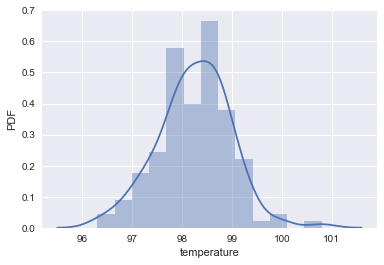

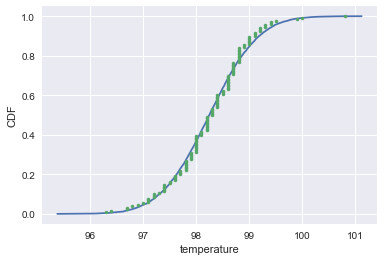

In [8]:
sns.set()

#Graph a histogram

sns.distplot(df.temperature)

_ = plt.ylabel('PDF')

plt.show()

#Graph actual and cumulative sample distributions

_ = plt.plot(x_theor, y_theor)

_ = plt.plot(x, y, marker='.', linestyle='none')

_ = plt.xlabel('temperature')

_ = plt.ylabel('CDF')

plt.show()

#The distrubution looks roughly normal in the CDF plot, however somewhat unclear in the histogram. 


In [9]:
#Do back of the evelope normality test

#H0: Distribution is normal.
#H1: Distribution is not normal.
#alpha = 0.05

stats.normaltest(df.temperature)

#Fail to reject null hypothesis.

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

Is the sample size large? Are the observations independent?

* Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [10]:
#Conditions for central limit theorem: random sample, idependence and sample < 10% population.

#Ramdom Sample: The data was obtained from volunteers in a clinic.

#Count Sample:

print('Sample Size:', len(df.temperature))

# Independence: 

#We can reasonably assume that 130 observations do not represent more than 10% of the human population.

Sample Size: 130


## Is the true population mean really 98.6 degrees F?
> #### First, try a bootstrap hypothesis test.
> #### Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
> #### In this situation, is it appropriate to use the $t$ or $z$ statistic? 
> #### Now try using the other test. How is the result be different? Why?

In [11]:
#Bootstrap hypothesis test. Alpha = 0.05

#Create bootstrap function

def bs_sample(v, function, size = 10000):
    
    #Generate random seed for replicability
    np.random.seed(42) 
    
    #Initialize replicates
    bs_sample = np.empty(size)
    
    #Create replicates
    for i in range(size):
        bs = function(np.random.choice(v, size=len(v)))
        bs_sample[i] = bs

    return  bs_sample

In [12]:
#Shift temperature data to have a mean of 98.6

shifted_sample = df.temperature + (98.6 - np.mean(df.temperature))

#Create Bootstrap replicates of shifted sample and temperature means

n=10000

shifted_bs_means = bs_sample(shifted_sample, np.mean, n)

bs_means = bs_sample(df.temperature, np.mean, n)

#Find p value. Find instances in which the shifted means are below or equal to 
#the sample temperature means.

pvalue = np.sum(shifted_bs_means <= np.mean(df.temperature))/n

#Perform Hypothesis Test Using T-statistic. Alpha = 0.05

#H0: The population mean equals 96.5
#H1: The population mean does not equal 96.5

print('Mean Sample Temperature: ' + str(round(np.mean(df.temperature),2)))
print('Mean Shifted Sample Temperature: ' + str(round(np.mean(shifted_sample),2)))
print('P-value: ' + str(pvalue))
print('The p-value is below the set alpha level of 5%, we reject the null hypothesis that the population mean is 98.6')

Mean Sample Temperature: 98.25
Mean Shifted Sample Temperature: 98.6
P-value: 0.0
The p-value is below the set alpha level of 5%, we reject the null hypothesis that the population mean is 98.6


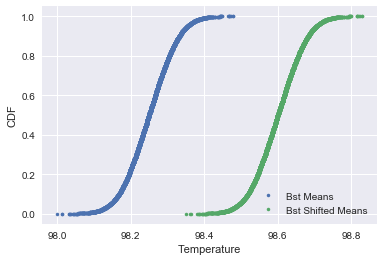

In [13]:
#Plot CDF plot 

# Compute ecdfs

x_bs_means, y_bs_means = ecdf(bs_means)
x_bs_means_shifted, y_bs_means_shifted = ecdf(shifted_bs_means)


plt.plot(x_bs_means, y_bs_means, marker='.', linestyle='none')
plt.plot(x_bs_means_shifted, y_bs_means_shifted, marker='.', linestyle='none')
plt.ylabel('CDF')
plt.xlabel('Temperature')
plt.legend(('Bst Means', 'Bst Shifted Means'),loc=4)

> #### Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
> #### In this situation, is it appropriate to use the $t$ or $z$ statistic? 
> *One would use a one sample test since only one sample has been provided. The t-test is more appropitate in this case, because we do not have the population standard deviation. Since we do not have the population standard deviation it needs to be estimated, which the t-statistic does.*

> *Z statistics more appropiate for when the standard deviation of the population (a distribution parameter) is known and proportions such as the binomial distribution.*

In [14]:
#Perform one-sample t-test on the temperature data. 

temp_ttest, temp_pvalue = stats.ttest_1samp(df.temperature, 98.6)

print('One-Sample T-Test =',round(temp_ttest,2),'\nTwo tailed P-value =',round(temp_pvalue,3))

#The t-test calculation can also be done manually as follows: 

temp_ttest2 = (np.mean(df.temperature)-98.6)/(np.std(df.temperature)/math.sqrt(len(df.temperature)))
print('One Sample T-Test Manual =',round(temp_ttest2,2))

#This t-statistic on a table t-table results results in a P-value < 0.0005

One-Sample T-Test = -5.45 
Two tailed P-value = 0.0
One Sample T-Test Manual = -5.48


> #### Now try using the other test. How is the result be different? Why?

> *The p-value is smaller using the z-score for hypothesis testing. Z statistics more appropiate for when the standard deviation of the population (a distribution paraneters) is known and proportions such as the binomial distribution.*

In [15]:
#Calculate z - statistic and their p-value

tempZ, dummy = stats.ttest_1samp(df.temperature, 98.6)
p_valuez = stats.norm.sf(abs(tempZ))*2
print('Two tailed P-value =',p_valuez)

#Using the 

#They result in the same value

zscore, p_valuez2 = ztest(df.temperature,value=98.6)

print('Two tailed P-value =',p_valuez2)
print('Z-score =',zscore)

#Perform Hypothesis Test using z-score statistic

#H0: The population mean equals 96.5
#H1: The population mean does not equal 96.5

print('The p-value is below the set alpha level of 5%, we reject the null hypothesis that the population mean is 98.6')

Two tailed P-value = 4.9021570141012155e-08
Two tailed P-value = 4.9021570141012155e-08
Z-score = -5.4548232923645195
The p-value is below the set alpha level of 5%, we reject the null hypothesis that the population mean is 98.6


## Draw a small sample of size 10 from the data and repeat both frequentist tests. 
   
* Which one is the correct one to use? 
* What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

> *The p-value of the z-test is lower than the p-value of the z-test. Since the sample is < 30 the assumptions of the central limit theorem may not be satisfied. The p-values of a sample of 10 are larger than for the sample of 130.The t-test is more appropiate than the z-score beacause population distribution paramerters are unknown.*

In [16]:
#Draw 10 samples

sample10 = np.random.choice(df['temperature'], size = 10)

#Perform a z-test on the sample

z_test_10 = ztest(sample10,value=98.6)

#Perform a t-test on the sample

t_test_10 = stats.ttest_1samp(sample10,98.6)

#View Results

print('T-test:', t_test_10)
print('Z-test:', z_test_10)

T-test: Ttest_1sampResult(statistic=2.2948907108029672, pvalue=0.047393936397399125)
Z-test: (2.2948907108029672, 0.021739388297612402)


## At what temperature should we consider someone's temperature to be "abnormal"?

* As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
* Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [17]:
#Bootstrap confidence interval from the sample using 10K draws. 

#Create bootstrap sample means distribution. Used same function and nsamples (10K) as the previous question.

bs_means2 = bs_sample(df.temperature, np.mean, size = 10000)

#Find 95% confidence interval
bs_interval = np.percentile(bs_means2, [2.5,97.5])

#print the results
print('Bootstrap 95% confidence interval:', str(round(bs_interval[0],2))+',', round(bs_interval[1],2))

Bootstrap 95% confidence interval: 98.12, 98.37


In [18]:
#Bootstrap confidence interval from the sample using 1 draw. 

bs_means3 = bs_sample(df.temperature, np.mean, size=1)

#Find 95% confidence interval
bs_interval_1 = np.percentile(bs_means, [2.5,97.5])

#print the results
print('Bootstrap 95% confidence interval:', str(round(bs_interval_1[0],2))+',', round(bs_interval_1[1],2))

Bootstrap 95% confidence interval: 98.12, 98.37


In [31]:
# Margin of Error
critical_z = 1.96 # z-value corresponding to 95% confidence interval
standard_e = np.std(df.temperature)/np.sqrt(len(df.temperature))
margin_e = critical_z * standard_e 
print('The margin of error on the mean temperature is: ', margin_e,)

#Confidence using the sample

sample_interval = np.percentile(df.temperature, [2.5, 97.5])
print('Sample 95% confidence interval:', str(round(sample_interval[0],2))+',', round(sample_interval[1],2))

The margin of error on the mean temperature is:  0.125550964802579
Sample 95% confidence interval: 96.72, 99.48


In [20]:
#Confidence interval using sample of 10

sample10_interval = np.percentile(sample10, [2.5, 97.5])
print('Sample 95% confidence interval:', str(round(sample10_interval[0],2))+',', round(sample10_interval[1],2))


Sample 95% confidence interval: 98.11, 99.46


# Is there a significant difference between males and females in normal temperature?

* What testing approach did you use and why?
* Write a story with your conclusion in the context of the original problem.

In [21]:
#Slit dataframe by gender

df_male = df[df.gender == 'M']

df_female = df[df.gender == 'F']

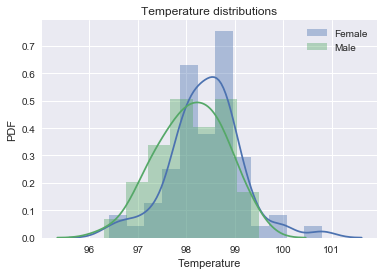

In [22]:
#Plot male and female temperature samples.

f, ax = plt.subplots(1,1)
sns.distplot(df_female.temperature, ax=ax, label='Female')
sns.distplot(df_male.temperature, ax=ax, label='Male')
sns.despine()
ax.set_xlabel('Temperature')
ax.set_ylabel('PDF')
ax.set_title('Temperature distributions')
plt.legend()
plt.show()

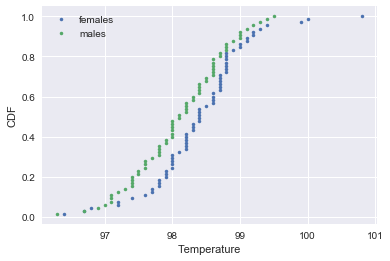

In [23]:
#Plot CDF plot 

# Compute ecdfs

x_female, y_female = ecdf(df_female.temperature)
x_male, y_male = ecdf(df_male.temperature)

_ = plt.plot(x_female, y_female, marker='.', linestyle='none')
_ = plt.plot(x_male, y_male, marker='.', linestyle='none')
_ = plt.ylabel('CDF')
_ = plt.xlabel('Temperature')
_ = plt.legend(('females', 'males'))

#It seems female temperatures skew a higher.

In [25]:
#Hypothesis testing using frequentist approach. Alpha = 0.05

#H0: The gender male and female sample means is the same.I.e difference is 0.
#H1: The gender male and female sample means is not the same.I.e difference does not equal 0.

gender_tstat, gender_pvalue = stats.ttest_ind(df_male.temperature,df_female.temperature)

print('T-statistic: ', gender_tstat)
print('P-value T-Test: ', gender_pvalue)

#Reject the null hypothesis that the male and female sample means is the same

T-statistic:  -2.2854345381656103
P-value T-Test:  0.02393188312239561


In [26]:
#Hypothesis testing using bootstrap replicates approach. Alpha = 0.05

#H0: The gender male and female sample means is the same.I.e difference is 0.
#H1: The gender male and female sample means is not the same.I.e difference does not equal 0.

# Generate shifted arrays
females_shifted = df_female.temperature - np.mean(df_female.temperature) + np.mean(df.temperature)
males_shifted = df_male.temperature - np.mean(df_male.temperature) + np.mean(df.temperature)

# Compute 10,000 bootstrap replicates from shifted arrays
bs_females = bs_sample(females_shifted, np.mean, size=10000)
bs_males = bs_sample(males_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates_diff = bs_females - bs_males

sample_diff_means = np.mean(df_female.temperature) - np.mean(df_male.temperature)

# Compute and print p-value: p
pvalue_gender_diff = np.sum(bs_replicates_diff >= sample_diff_means) / len(bs_replicates_diff)

print('P-value bootstrap =', pvalue_gender_diff)

#Reject the null hypothesis that the male and female sample means is the same.

P-value bootstrap = 0.0114


In [ ]:
#Plot CDF plot

# Compute ecdfs

x_bs_means_female, y_bs_means_females = ecdf(bs_females)
x_bs_means_males, y_bs_means_males = ecdf(bs_males)


plt.plot(x_bs_means_female, y_bs_means_females, marker='.', linestyle='none')
plt.plot(x_bs_means_males, y_bs_means_males, marker='.', linestyle='none')
plt.ylabel('CDF')
plt.xlabel('Temperature')
plt.legend(('Bst Means Females', 'Bst Means Males'),loc=4)

In [28]:
#Hypothesis testing using permutation approach. Alpha = 0.05

#H0: The gender male and female sample means is the same.I.e difference is 0.
#H1: The gender male and female sample means is not the same.I.e difference does not equal 0.

# Define test statistic 
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    return np.mean(data_1) - np.mean(data_2)

# Compute test statistic for observed data
diff_means_gender = diff_of_means(df_female.temperature, df_male.temperature)


# Draw permutation replicates
perm_replicates = np.empty(10000)
for i in range(len(perm_replicates)): 
    
    # Permute the data
    concat = np.concatenate((df_male.temperature, df_female.temperature))
    permute = np.random.permutation(concat)
    perm_females = permute[:len(df_male)]
    perm_males = permute[len(df_female):]
    
    #Draw replicates
    perm_replicates[i] = diff_of_means(perm_females, perm_males)


# Compute p-value
p_value_permute = np.sum(abs(perm_replicates) >= abs(diff_means_gender)) / len(perm_replicates)

print('P-value permutation:',p_value_permute)

#Reject the null hypothesis that the male and female sample means is the same.

P-value permutation: 0.023


# Conclusion

* Temperature data is roughly normal.
* The conditions for the central limit theorem random, independence and sample size > 30 were met.
* Using both a bootsrap approach and a frequentist approach we can conclude that is highly unlikely the population temperature mean value is 98.6.
* Using a bootstrap, permutation and frequentist approaches, I find that there is a statistically significant difference between the males and females body temperatures. Females tend to have warmer bodies than males.
* Carl Wunderlich finding that the normal human body temperature is 98.6 seem statistically unlikely.

# End of Notebook